In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
np.random.seed(8118118)

%matplotlib inline

Processing Data

Open the training file in read mode, thus creating a file reference
Save the contents of the training file into a list of strings
Close the training file reference

In [3]:
training_data_file_ref = open("./MNIST/mnist_train.csv", 'r')
training_data_list = training_data_file_ref.readlines();
training_data_file_ref.close();

testing_data_file_ref = open("./MNIST/mnist_test.csv", 'r')
testing_data_list = testing_data_file_ref.readlines();
testing_data_file_ref.close()

Plotting Data
Create an array of individual string characters of the form <label>,<x1>,<x2>,...<x784> where x is the image tensor
Separate out the label from the image tensor, and shape the tensor to 28x28 creating a new row on each multiple of 29
Plot the data using greys with no smoothing
Print the label

3


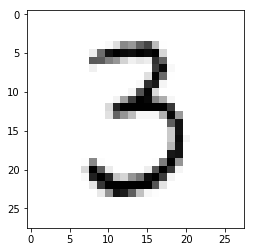

In [4]:
training_data_array = training_data_list[50].split(',')
img_array = np.asfarray(training_data_array[1:]).reshape((28,28))
plt.imshow(img_array, cmap='Greys', interpolation='None')
print(training_data_array[0])

Scaling Data
Scale the data by dividing everything by 255, thus scaling by 255, multiplying by 0.99, thus scaling component of the image back 0.1, and then adding 0.1 thus eliminating all 0's and preserving all 1's
Create image array as above
Plot using greys and no smoothing

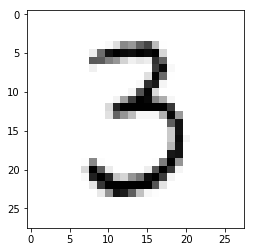

In [4]:
scaled_training_data = (np.asfarray(training_data_array[1:])/255 * 0.99) + 0.01
scaled_img_array = scaled_training_data.reshape((28,28))
plt.imshow(scaled_img_array, cmap='Greys', interpolation='None')

Neural Network Class

inputNodes is the number of nodes in the input layer
hiddenNodes is the number of nodes in the hidden layer
outputNodes is then number of nodes in the output layer

learningRate is the step size when undergoing learning

In [5]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.learning_rate = learning_rate
        
        self.input_to_hidden_weights = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.hidden_to_output_weights = np.random.normal(0.0, pow(self.output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
    
    def activate(self, x):
        return special.expit(x)
    
    def train(self, input_list, target_list):
        #convert input_list into a 2d array
        input = np.array(input_list, ndmin=2).T
        #convert target_list into a 2d array
        target = np.array(target_list, ndmin=2).T
        
        #calculate signals in and out of hidden layers
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        
        
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        output_error = target - output_output_signal
        
        hidden_error = np.dot(self.hidden_to_output_weights.T, output_error)
        
        self.hidden_to_output_weights += self.learning_rate * np.dot((output_error * output_output_signal * (1.0 - output_output_signal)), np.transpose(hidden_output_signal))
        self.input_to_hidden_weights += self.learning_rate * np.dot((hidden_error * hidden_output_signal * (1-hidden_output_signal)), np.transpose(input))
    
    
    def query(self, input):
        #convert input_list into a 2d array
        input = np.array(input, ndmin=2).T        
        
        hidden_input_signal = np.dot(self.input_to_hidden_weights, input)
        hidden_output_signal = self.activate(hidden_input_signal)
        output_input_signal = np.dot(self.hidden_to_output_weights, hidden_output_signal)
        output_output_signal = self.activate(output_input_signal);
        
        return output_output_signal
    def shape(self):
        return [self.input_nodes, self.hidden_nodes, self.output_nodes];

In [6]:
num_input = 784
num_hidden = 100
num_output = 10
lr = 0.03

NN = NeuralNetwork(num_input, num_hidden, num_output, lr);
print(NN.shape())

[784, 100, 10]


Train the Neural Network

epoch: 0


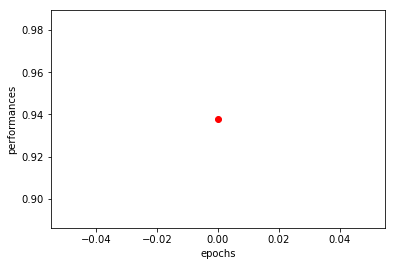

Performance:  0.9378
epoch: 1


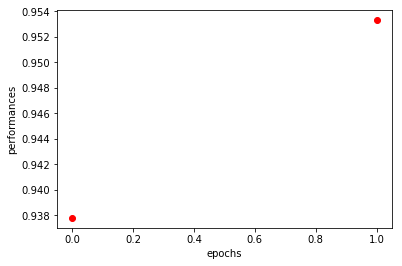

Performance:  0.9533
epoch: 2


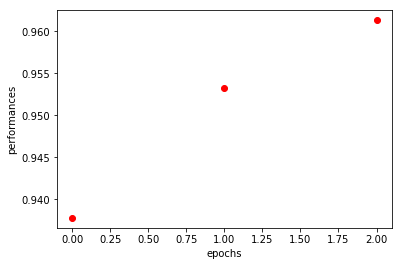

Performance:  0.9613
epoch: 3


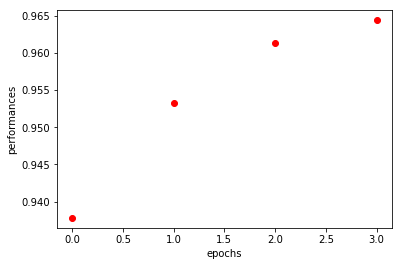

Performance:  0.9644
epoch: 4


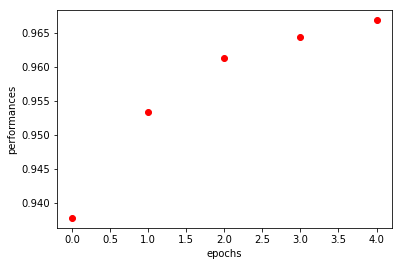

Performance:  0.9668
epoch: 5


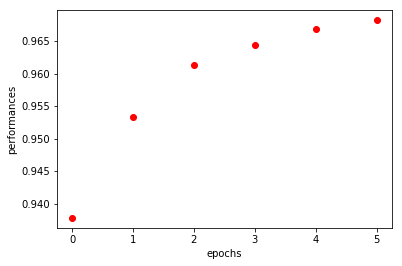

Performance:  0.9682
epoch: 6


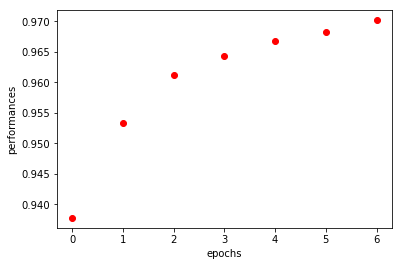

Performance:  0.9702
epoch: 7


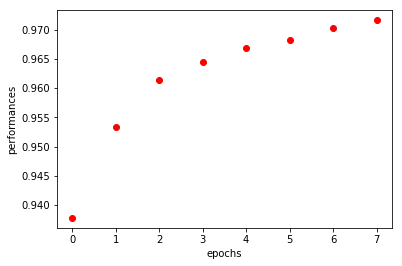

Performance:  0.9716
epoch: 8


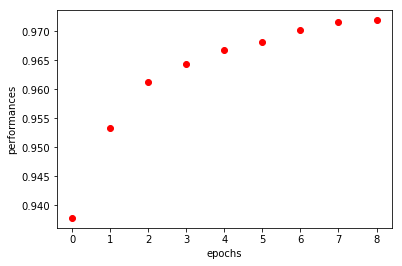

Performance:  0.9719
epoch: 9


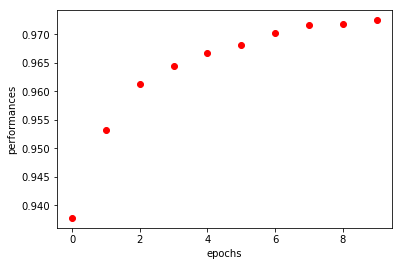

Performance:  0.9725


In [7]:
epochs = 10
performances = []
epochList = []
for epoch in range(epochs):
    print("epoch: {}".format(epoch))
    epochList.append(epoch)
    for record in training_data_list:
        training_data_string_array = record.split(',')
        input = (np.asfarray(training_data_string_array[1:])/255.0 * 0.99 )+ 0.01
        target = np.zeros(num_output) + 0.01
        target[int(training_data_string_array[0])] = 0.99
        NN.train(input, target)
    num_true = 0
    for record in testing_data_list:
        testing_data_string_array = record.split(',')    
        input = np.asfarray(testing_data_string_array[1:])/255.0 * 0.99 + 0.01
        guess = np.argmax(NN.query(input))
        truth = int(testing_data_string_array[0])

        if(guess == truth):
            num_true += 1
    performances.append(num_true/len(testing_data_list))
    plt.plot(epochList, performances, 'ro')
    plt.ylabel("performances")
    plt.xlabel("epochs")
    plt.show()
    print("Performance: ", num_true/len(testing_data_list))
    